In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

## First talk: Merge all the data into a single file

In [2]:
df = pd.read_csv("C:/Users/noela/Desktop/ReseachProject/my_data/usa_weather_data_2000_.csv")
files = [file for file in os.listdir("C:/Users/noela/Desktop/ReseachProject/my_data")]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("C:/Users/noela/Desktop/ReseachProject/my_data/" + file)
    all_data = pd.concat([all_data, df])
    
all_data.to_csv("all_data.csv", index = False)

## Read in updated framework

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Date,State,City,Zone ID,Min_Temperature,Mean_Temperature,Max_Temperature
0,2000/01,Alabama,Mobile,KBFM,27.0,52.805593,79.0
1,2000/01,Alabama,Montgomery,KMXF,25.0,6.986270,77.0
2,2000/01,Alabama,Mobile,KMOB,25.0,53.179901,77.0
3,2000/01,Alabama,Birmingham,KBHM,18.0,43.460048,69.0
4,2000/01,Alabama,Mobile,1AZ0,34.0,36.660934,81.0


## Add a year and a month column

In [4]:
all_data["Year"] = all_data["Date"].str[0:4]
all_data["Year"] = all_data["Year"].astype("int32")

all_data["Month"] = all_data["Date"].str[5:]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Date,State,City,Zone ID,Min_Temperature,Mean_Temperature,Max_Temperature,Year,Month
0,2000/01,Alabama,Mobile,KBFM,27.0,52.805593,79.0,2000,1
1,2000/01,Alabama,Montgomery,KMXF,25.0,6.986270,77.0,2000,1
2,2000/01,Alabama,Mobile,KMOB,25.0,53.179901,77.0,2000,1
3,2000/01,Alabama,Birmingham,KBHM,18.0,43.460048,69.0,2000,1
4,2000/01,Alabama,Mobile,1AZ0,34.0,36.660934,81.0,2000,1


In [5]:
all_data["Mean_Temperature"] = pd.to_numeric(all_data["Mean_Temperature"])
all_data["Min_Temperature"] = pd.to_numeric(all_data["Min_Temperature"])
all_data["Max_Temperature"] = pd.to_numeric(all_data["Max_Temperature"])
all_data["Year"] = pd.to_numeric(all_data["Year"])
all_data["Month"] = pd.to_numeric(all_data["Month"])

## Ploting temperatures in the USA

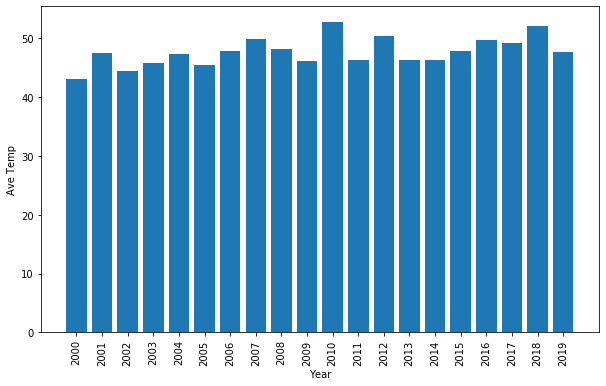

In [14]:
year = [year for year, df in all_data.groupby("Year")]
results = all_data.groupby('Year')['Mean_Temperature'].mean()

plt.bar(year, results)
plt.xticks(year, rotation = 'vertical', size = 10)
plt.ylabel("Ave Temp")
plt.xlabel("Year")
plt.show()

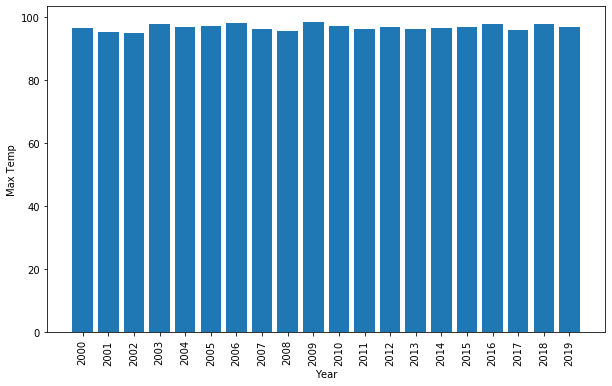

In [22]:
year = [year for year, df in all_data.groupby("Year")]
results = all_data.groupby('Year')['Mean_Temperature'].max()

plt.bar(year, results)
plt.xticks(year, rotation = 'vertical', size = 10)
plt.ylabel("Max Temp")
plt.xlabel("Year")
plt.show()

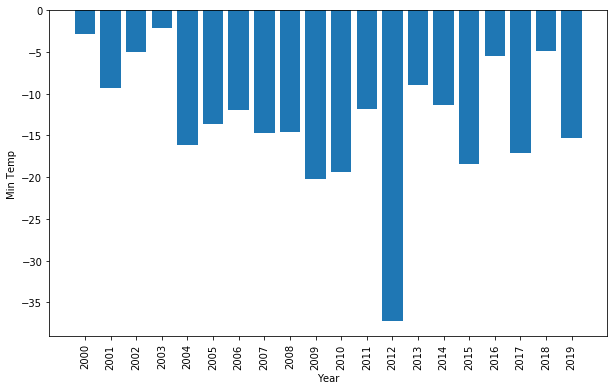

In [23]:
year = [year for year, df in all_data.groupby("Year")]
results = all_data.groupby('Year')['Mean_Temperature'].min()

plt.bar(year, results)
plt.xticks(year, rotation = 'vertical', size = 10)
plt.ylabel("Min Temp")
plt.xlabel("Year")
plt.show()

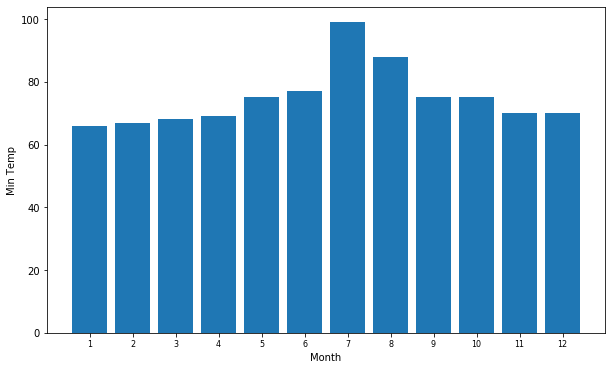

In [24]:
month = [month for month, df in all_data.groupby("Month")]
results = all_data.groupby('Month')['Min_Temperature'].max()

plt.bar(month, results)
plt.xticks(month, size = 8)
plt.ylabel("Min Temp")
plt.xlabel("Month")
plt.show()

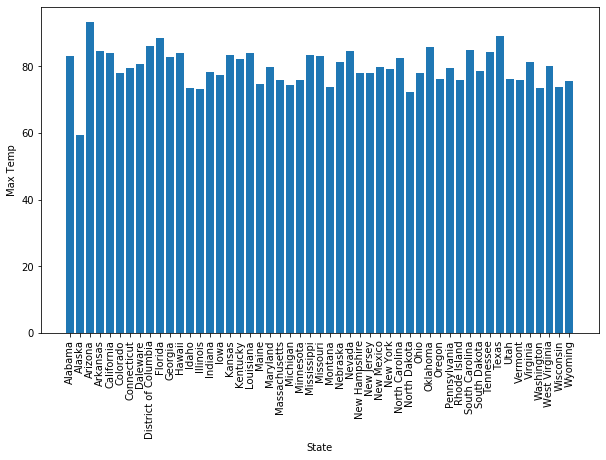

In [25]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September",
          "October", "November", "December"]
states = [state for state, df in all_data.groupby("State")]
results = all_data.groupby('State')['Max_Temperature'].mean()

plt.bar(states, results)
plt.xticks(states, rotation = 'vertical', size = 10)
plt.ylabel("Max Temp")
plt.xlabel("State")
plt.rcParams['figure.figsize'] = (10,6)
plt.show()